##Emotion detection:
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

Tamaño: 35.9k



*   Train: 24.282
    * Angry: 3995
    * Disgusted: 436
    * Fearful: 4097
    * Happy: 7215
    * Neutral: 4965
    * Sad: 4830
    * surprised: 3171

*   Test: 7178








#Librerias



In [122]:
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
sns.set_theme()
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
from sklearn.metrics import classification_report


2.12.0


In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Montar el drive

In [124]:
import os
from google.colab import drive

path = "/content/drive/My Drive/Proyecto IA"
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1RJdbXAWiwID162JN0IevNCxkN1GB4qOj/Proyecto IA


#Cargar y procesar los datos

##importar los datos

In [125]:
imagenes, etiquetas= load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')

In [126]:
# Cargar el conjunto de datos desde el archivo
datos, datosV, etiquetas, etiquetasV = load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset.pkl')

##Pre-procesar los datos

In [ ]:
from sklearn.model_selection import train_test_split

# Separar el 10% de los datos en una nueva variable
datos, datosV, etiquetas, etiquetasV = train_test_split(imagenes, etiquetas, test_size=0.1, random_state=42)

# Verificar el tamaño de los conjuntos de datos
print("Tamaño del conjunto de datos:", len(datos))
print("Tamaño del conjunto de validación:", len(datosV))

In [127]:
X_train, X_test, y_train, y_test = train_test_split(datos.reshape(len(datos), -1), etiquetas, test_size=0.3, random_state=22)

##visualizar algunos datos

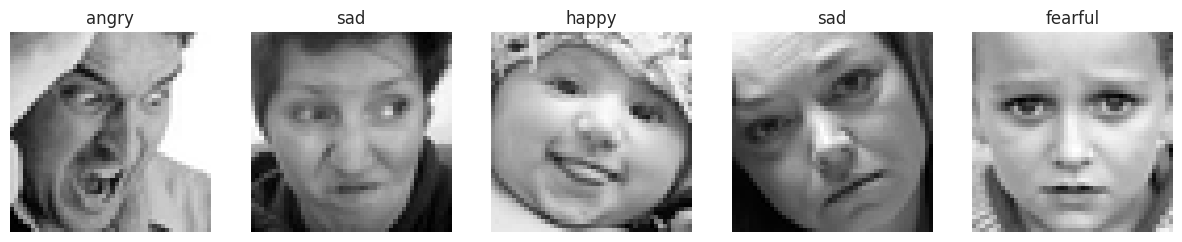

In [128]:
def visualizar_imagenes(imagenes, etiquetas, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(etiqueta)
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_imagenes(datosV, etiquetasV, num_imagenes_visualizar)

#Cargar modelos

##Modelo 1

In [ ]:
# Cargar el modelo desde el archivo
modelo1 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl')

##Modelo 2

In [ ]:
# Cargar el modelo desde el archivo
modelo2 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl')

##Modelo 3

In [129]:
# Cargar el modelo desde el archivo
modelo3 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl')

##Modelo 4

In [ ]:
# Cargar el modelo desde el archivo
modelo4 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo4bien.pkl')

#Prueba de modelos

##Funcion

In [130]:
# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

# Modelos

#Preparar los datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datos.reshape(len(datos), -1), etiquetas, test_size=0.3, random_state=22)

#Modelo 1: Gaussian Naive Bayes


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos de entrenamiento y prueba


# Crear y entrenar el modelo Gaussian Naive Bayes
modelo1 = GaussianNB()
modelo1.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo1.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo1:", exactitud)
print(classification_report(y_test, y_pred))

Exactitud del modelo1: 0.21923356527157545
              precision    recall  f1-score   support

       angry       0.21      0.04      0.07      1355
   disgusted       0.02      0.21      0.04       136
     fearful       0.24      0.06      0.09      1366
       happy       0.38      0.15      0.22      2335
     neutral       0.27      0.16      0.21      1685
         sad       0.26      0.40      0.31      1668
   surprised       0.21      0.59      0.31      1084

    accuracy                           0.22      9629
   macro avg       0.23      0.23      0.18      9629
weighted avg       0.27      0.22      0.20      9629



In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
#dump(modelo1, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')


['/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl']

Exactitud en los datos de validación: 0.1519910263600673


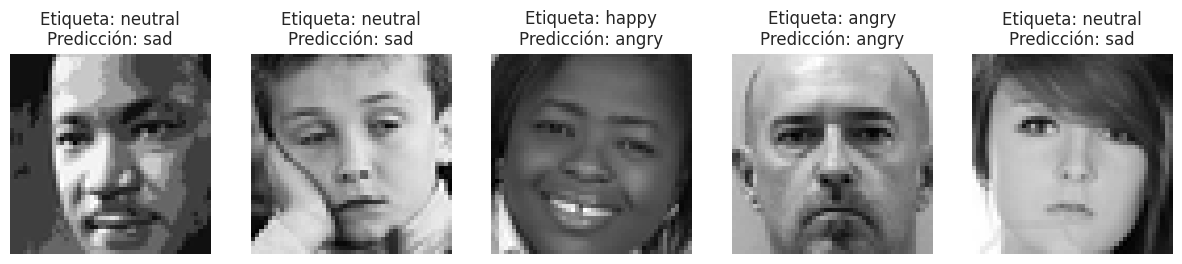

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo1.predict(X_val)

# Calcular la exactitud en los datos de validación
accuracy_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", accuracy_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)


#Modelo 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


modelo2 = DecisionTreeClassifier(max_depth=8)##que tan grande haga los arboles

modelo2.fit(X_train,y_train)
print(accuracy_score(modelo2.predict(X_test), y_test))
print(classification_report(y_test, y_pred))

0.31114342091598296
              precision    recall  f1-score   support

       angry       0.21      0.04      0.07      1355
   disgusted       0.02      0.21      0.04       136
     fearful       0.24      0.06      0.09      1366
       happy       0.38      0.15      0.22      2335
     neutral       0.27      0.16      0.21      1685
         sad       0.26      0.40      0.31      1668
   surprised       0.21      0.59      0.31      1084

    accuracy                           0.22      9629
   macro avg       0.23      0.23      0.18      9629
weighted avg       0.27      0.22      0.20      9629



In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
#dump(modelo2, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl')



['/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl']

Precisión en los datos de validación: 0.30846887268648343


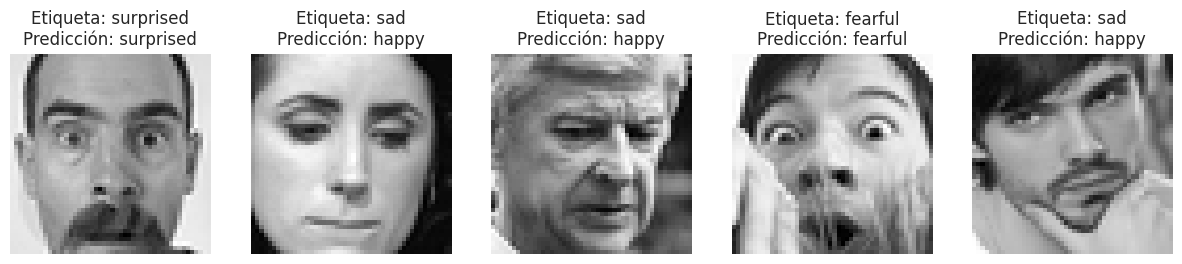

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo2.predict(X_val)

# Calcular la exactitud en los datos de validación
accuracy_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", accuracy_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Modelo 3: Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Random Forest
modelo3 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo3.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo3.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo1:", exactitud)
print(classification_report(y_test, y_pred))


Exactitud del modelo1: 0.44635995430470454
              precision    recall  f1-score   support

       angry       0.47      0.20      0.28      1355
   disgusted       1.00      0.32      0.48       136
     fearful       0.46      0.25      0.33      1366
       happy       0.43      0.78      0.55      2335
     neutral       0.41      0.38      0.39      1685
         sad       0.37      0.33      0.35      1668
   surprised       0.67      0.58      0.62      1084

    accuracy                           0.45      9629
   macro avg       0.54      0.41      0.43      9629
weighted avg       0.46      0.45      0.43      9629



In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
#dump(modelo3, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

['/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl']

Exactitud en los datos de validación: 0.4461581604038138


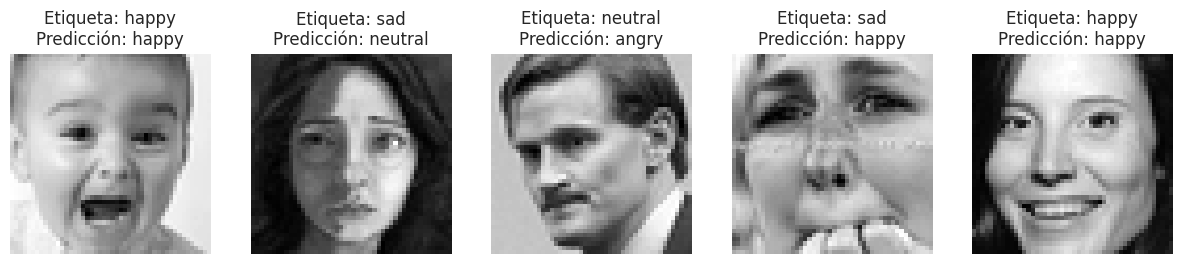

In [143]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo3.predict(X_val)

# Calcular la exactitud en los datos de validación
accuracy_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", accuracy_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Modelo 4: Support Vector Machine **(NO SIRVIÓ)**

In [ ]:
# Predecir las etiquetas para los datos de prueba
y_pred = modelo4.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo4:", exactitud)

Precisión en los datos de validación: 0.01065619742007852


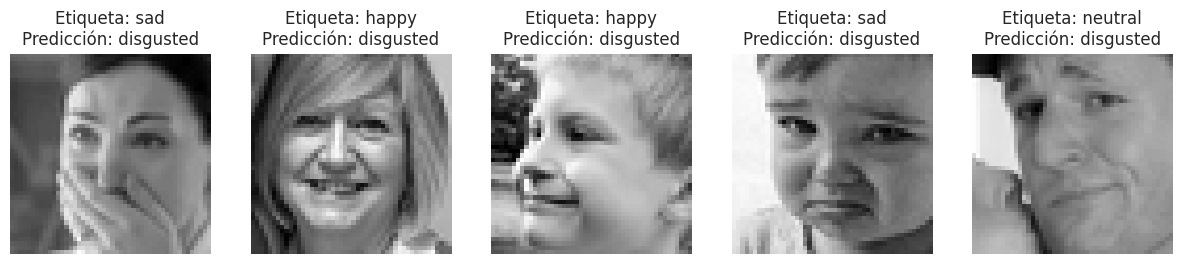

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo4.predict(X_val)

# Calcular la exactitud en los datos de validación
exactitud_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", exactitud_val)

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)